# Proj - House Loan Data Analysis

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# load dataset

In [4]:
data = pd.read_csv('loan_data.csv')

# checking for null values

In [6]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:

data= data.drop(['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)


In [8]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_HOUR    41519
Length: 117, dtype: int64

In [9]:
data = data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR'],axis=1)

In [10]:
data.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 116, dtype: int64

# we had a lot of missing values on the above columns so we dropped all that columns.
# now there is no missing values in our data as per above shown

# Print the percentage of default to a payer of the dataset for the TARGET column

# here Target column represent the loan default status

In [11]:
default= data['TARGET'].value_counts(normalize=True) * 100
print(f"Percentage of Defaulters: {default[1]:.2f}%")
print(f"Percentage of Non-Defaulters: {default[0]:.2f}%")


Percentage of Defaulters: 8.07%
Percentage of Non-Defaulters: 91.93%


# Check for data imbalance and balance it/ encoding

# as in Target column there are many too many 0 than 1 , it means there is imbalance in data. hence we need to balance the data here
# here we are going to use SMOTE technique for data balance

In [12]:
# separate the columns

X = data.drop(columns=['TARGET'])
y = data['TARGET']

In [14]:
# here we also need to check the datatype before applying the SMOTE to check if there is any categorical data present 

In [15]:
print(X.dtypes)


SK_ID_CURR             int64
NAME_CONTRACT_TYPE    object
CODE_GENDER           object
FLAG_OWN_CAR          object
FLAG_OWN_REALTY       object
                       ...  
FLAG_DOCUMENT_17       int64
FLAG_DOCUMENT_18       int64
FLAG_DOCUMENT_19       int64
FLAG_DOCUMENT_20       int64
FLAG_DOCUMENT_21       int64
Length: 115, dtype: object


In [16]:
print(y.dtypes)

int64


# as it clearly showing that there is some object columns present in X so we need to fix it first

# ONE HOT ENCODING

In [17]:
X = pd.get_dummies(X, drop_first=True)

In [18]:
print(X.dtypes)

SK_ID_CURR                           int64
CNT_CHILDREN                         int64
AMT_INCOME_TOTAL                   float64
AMT_CREDIT                         float64
AMT_ANNUITY                        float64
                                    ...   
WALLSMATERIAL_MODE_Others             bool
WALLSMATERIAL_MODE_Panel              bool
WALLSMATERIAL_MODE_Stone, brick       bool
WALLSMATERIAL_MODE_Wooden             bool
EMERGENCYSTATE_MODE_Yes               bool
Length: 223, dtype: object


# by using One Hot Encoding, now there is no object columns here. now we again check for null values in X

In [21]:
X.isnull().sum()

SK_ID_CURR                          0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
                                   ..
WALLSMATERIAL_MODE_Others           0
WALLSMATERIAL_MODE_Panel            0
WALLSMATERIAL_MODE_Stone, brick     0
WALLSMATERIAL_MODE_Wooden           0
EMERGENCYSTATE_MODE_Yes             0
Length: 223, dtype: int64

In [34]:
import pandas as pd

X = X.dropna(axis=1, how='any')

In [35]:
X.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
218    0
219    0
220    0
221    0
222    0
Length: 223, dtype: int64

# Apply SMOTE

In [36]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [37]:
print(y_balanced.value_counts())

TARGET
1    282686
0    282686
Name: count, dtype: int64


# now data has been balanced

# Plot the data distribution

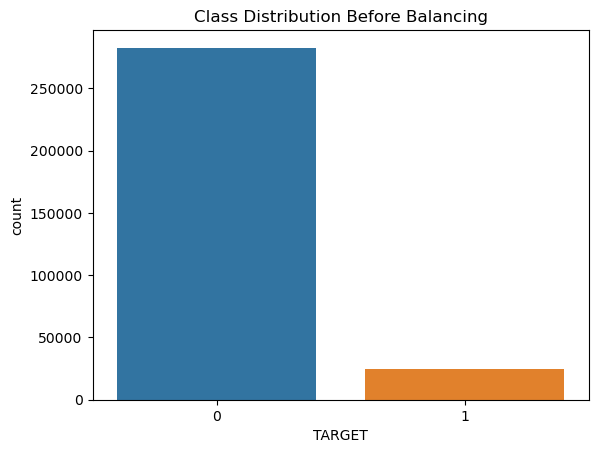

In [38]:
sns.countplot(x='TARGET', data=data)
plt.title('Class Distribution Before Balancing')
plt.show()

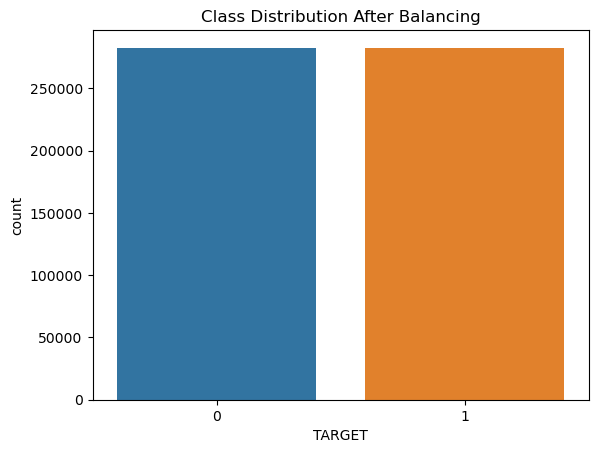

In [39]:
sns.countplot(x=y_balanced)
plt.title('Class Distribution After Balancing')
plt.show()

# Creating a neural network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [42]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Build the model

input_dim = X.shape[1]
model = Sequential()
model.add(Dense(64 ,activation='relu', input_shape=(input_dim,)))
model.add(Dense(1, activation='sigmoid'))


In [52]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7444 - loss: 0.5251 - val_accuracy: 0.8308 - val_loss: 0.3796
Epoch 2/20
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8458 - loss: 0.3550 - val_accuracy: 0.8568 - val_loss: 0.3366
Epoch 3/20
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8671 - loss: 0.3123 - val_accuracy: 0.8684 - val_loss: 0.3138
Epoch 4/20
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8762 - loss: 0.2933 - val_accuracy: 0.8744 - val_loss: 0.2989
Epoch 5/20
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8834 - loss: 0.2790 - val_accuracy: 0.8774 - val_loss: 0.2930
Epoch 6/20
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8880 - loss: 0.2708 - val_accuracy: 0.8715 - val_loss: 0.3066
Epoch 7/20
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8897 - loss: 0.2646 - val_accuracy: 0.8871 - val_loss: 0.2770
Epoch 8/20
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 

# Calculate the sensitivity

In [54]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity: {sensitivity:.2f}")

3534/3534 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Sensitivity: 0.87


# Specificity

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print(f"Specificity: {specificity:.2f}")

Specificity: 0.93


# ROC curve

In [55]:
auc = roc_auc_score(y_test, model.predict(X_test))
print(f"AUC Score: {auc:.2f}")

3534/3534 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
AUC Score: 0.96


3534/3534 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


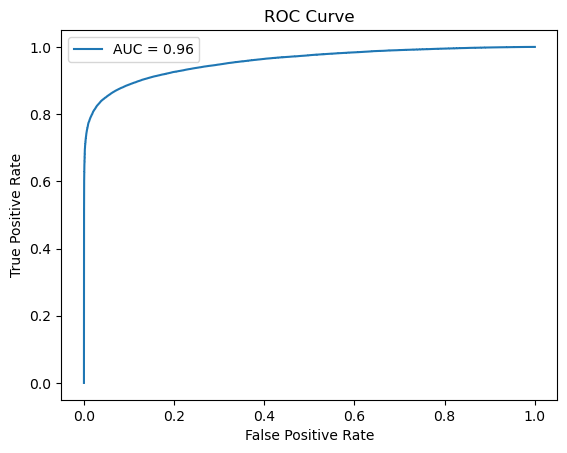

In [56]:
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Conclusion

# Model achieves a sensitivity of 87%, a specificity of 93%, and an AUC-ROC score of 0.96
# Model is 87% efficient to identify the defaulters
# Model is 93% efficient to identify non defaulters
# Model is 96% efficient to distinguish between defauters and non defaulters